<a href="https://colab.research.google.com/github/JuanCVanegas/Practical_Cases/blob/main/Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline


### Company Name:
Online Company

### Problem Type:
A/B Testing (Ads)

### Business Problem:
Evaluate the impact of an advertising campaign and quantify the proportion of its success that can be attributed to the ads.

### Business Goal:

Quantify the direct impact of ads on key performance metrics and use the insights to refine ad content, targeting, or placement for enhanced campaign success and revenue growth.

# Import Main libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency, chi2


%matplotlib inline

# Setting seaborn color palette
palette = sns.set_palette('bright')

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')
data = pd.read_csv('online_ad_AB.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Analysis and Visualization

In [ ]:
data.head()

,customerID,test group,made_purchase,days_with_most_add,peak ad hours,ad_count
0,1,ad,False,24,20,5
1,2,psa,False,21,16,9
2,3,psa,False,1,18,8
3,4,ad,False,20,23,7
4,5,ad,False,3,13,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customerID          20000 non-null  int64 
 1   test group          20000 non-null  object
 2   made_purchase       20000 non-null  bool  
 3   days_with_most_add  20000 non-null  int64 
 4   peak ad hours       20000 non-null  int64 
 5   ad_count            20000 non-null  int64 
dtypes: bool(1), int64(4), object(1)
memory usage: 800.9+ KB


In [ ]:
# What is the distribution between 2 groups?

data['test group'].value_counts(normalize=True) * 100

ad     60.265
psa    39.735
Name: test group, dtype: float64

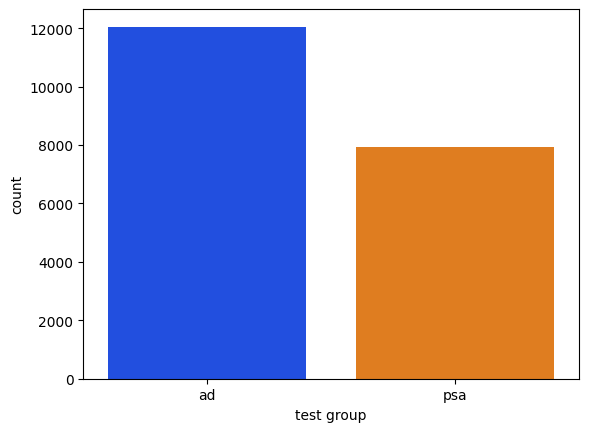

In [ ]:
sns.countplot(x=data['test group'])
plt.show()

In [ ]:
# split data into 2 groups

psa = data.loc[data['test group'] == "psa"]
ads = data.loc[data['test group'] == "ad"]

In [ ]:
# Creating a contingency table to check conversion rate for each group

contingency_table = pd.crosstab(index=data['made_purchase'], columns=data['test group'], margins = True)
contingency_table

test group,ad,psa,All
made_purchase,,,
False,11250,7690,18940
True,803,257,1060
All,12053,7947,20000


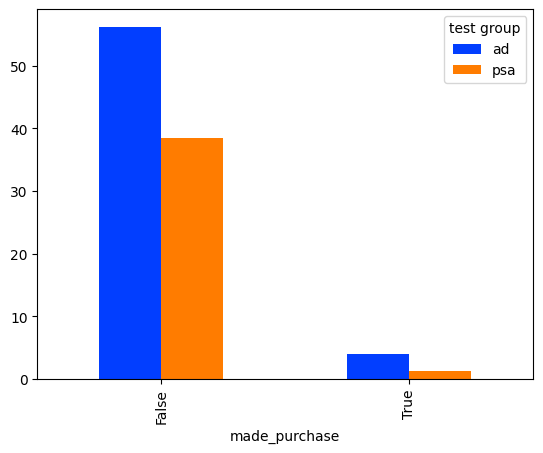

In [ ]:
# Plotting data

CT = pd.crosstab(index=data['made_purchase'], columns=data['test group'],normalize = True)*100
CT.plot(kind='bar')

plt.show()

# Hypothesis Testing

1. Null Hypothesis: The proportion of customers who made a purchase after seeing an ad is equal to the proportion of customers who made a purchase after seeing a PSA.

2. Alternative: The proportion of customers who made a purchase after seeing an ad is not equal to the proportion of customers who made a purchase after seeing a PSA.

Significance level is set to 0.05

In [ ]:
# Performing Chi-squared test for independence

chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared test statistic: {chi2_stat:.4f}")
print(f"p-value: {p}")

Chi-squared test statistic: 112.1513
p-value: 2.5298607497724276e-23


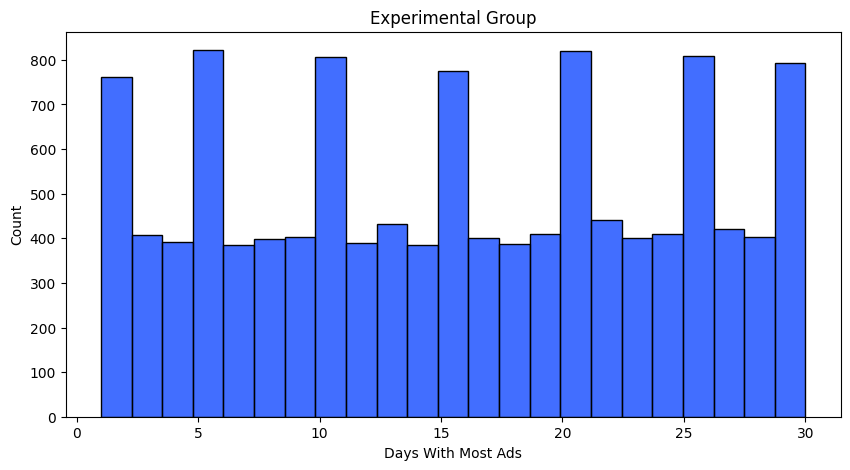

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=ads, x='days_with_most_add')
ax.set_title('Experimental Group')
plt.xlabel('Days With Most Ads')

plt.show()

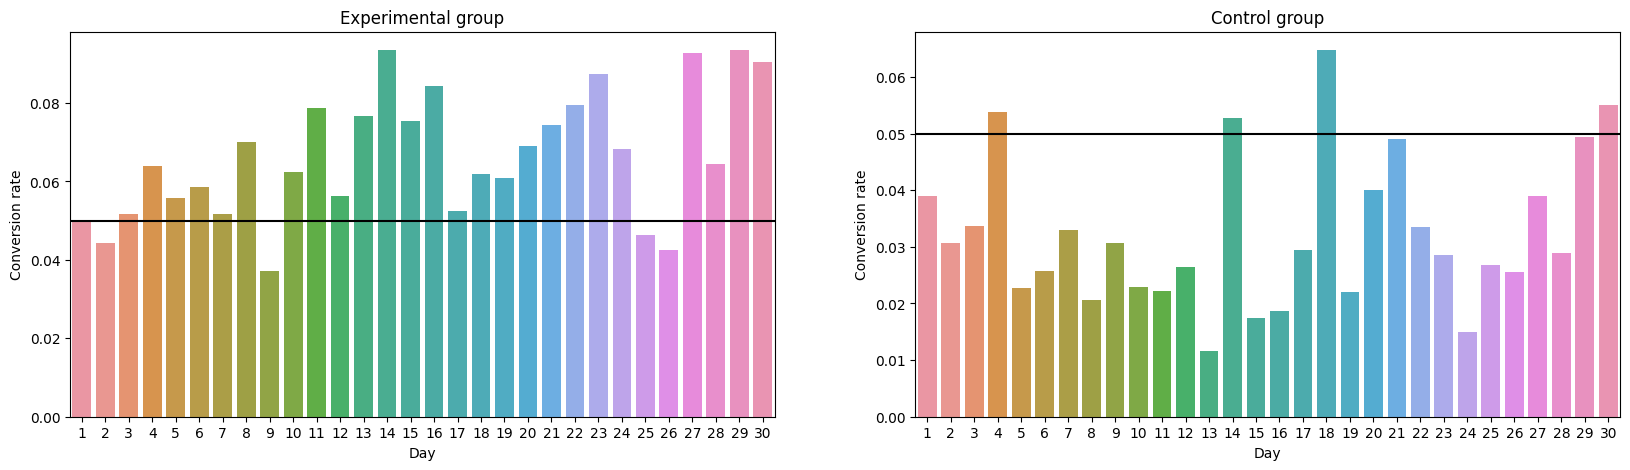

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(data=ads, x='days_with_most_add', y='made_purchase', errorbar=None, ax=ax1)
ax1.set_title('Experimental group')
ax1.set_xlabel('Day')
ax1.set_ylabel('Conversion rate')

sns.barplot(data=psa, x='days_with_most_add', y='made_purchase', errorbar=None, ax=ax2)
ax2.set_title('Control group')
ax2.set_xlabel('Day')
ax2.set_ylabel('Conversion rate')

ax1.axhline(y=0.05, color='black', linestyle='-')
ax2.axhline(y=0.05, color='black', linestyle='-')

plt.show()


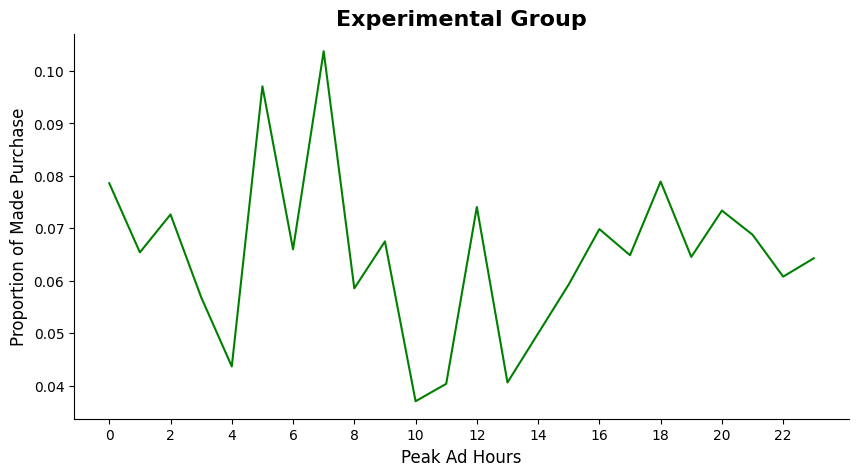

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=ads, x='peak ad hours', y='made_purchase', estimator=np.mean, errorbar=None, color='green')

# Customize the rest of the plot appearance
ax.set_title('Experimental Group', fontsize=16, fontweight='bold')
ax.set_xlabel('Peak Ad Hours', fontsize=12)
ax.set_ylabel('Proportion of Made Purchase', fontsize=12)
ax.set_xticks(range(0, 24, 2))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.show()



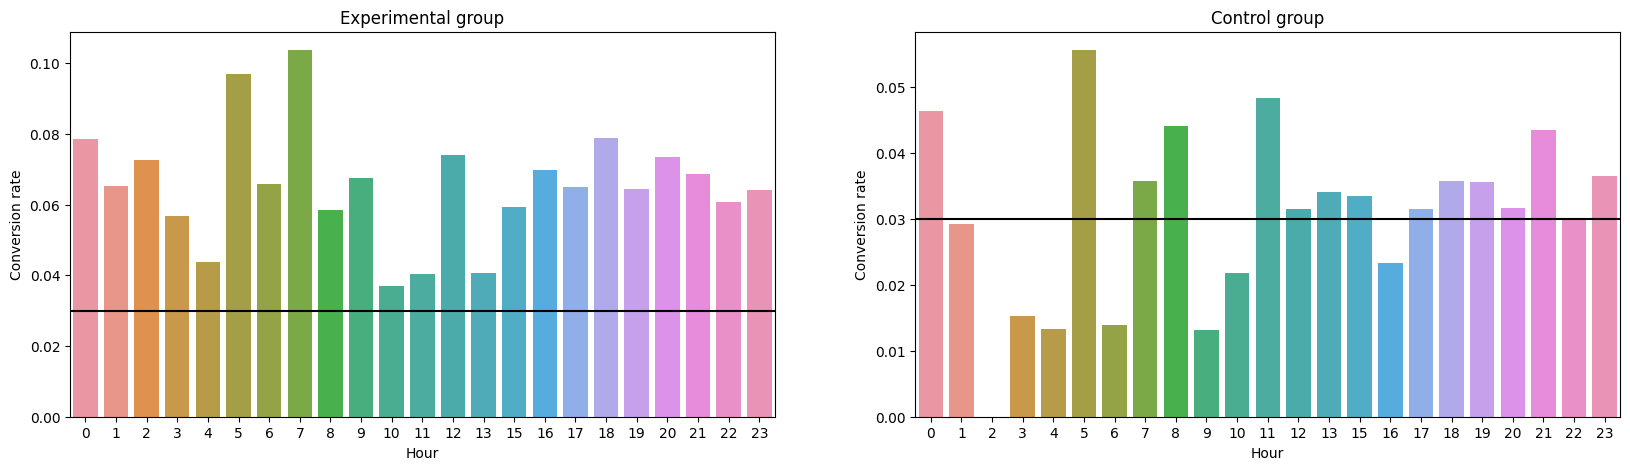

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(data=ads, x='peak ad hours', y='made_purchase', errorbar=None, ax=ax1)
ax1.set_title('Experimental group')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Conversion rate')

sns.barplot(data=psa, x='peak ad hours', y='made_purchase', errorbar=None, ax=ax2)
ax2.set_title('Control group')
ax2.set_xlabel('Hour')
ax2.set_ylabel('Conversion rate')

ax1.axhline(y=0.03, color='black', linestyle='-')
ax2.axhline(y=0.03, color='black', linestyle='-')

plt.show()

# Optimal Number of Ads

In [ ]:
# Creating a contingency table to find optimal number of ads

contingency_table = pd.crosstab(index=ads['ad_count'], columns=ads['made_purchase'], normalize='columns')
contingency_table = contingency_table.sort_values(by=True, ascending=False)

contingency_table

made_purchase,False,True
ad_count,,
5,0.171822,0.160648
7,0.119378,0.149440
8,0.128978,0.133250
9,0.131111,0.125778
6,0.123200,0.118306
10,0.122489,0.117061
2,0.050489,0.059776
3,0.051556,0.053549
1,0.050400,0.042341


<Figure size 1000x500 with 0 Axes>

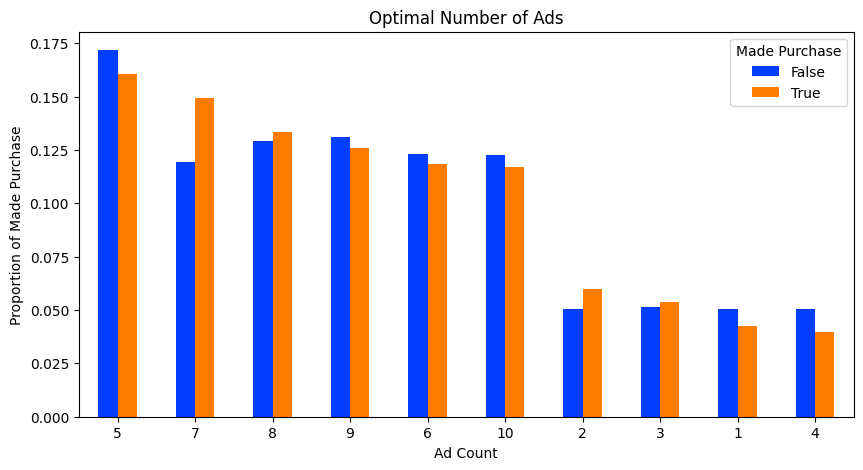

In [ ]:
# Sort the contingency table by the 'True' column in descending order
contingency_table = contingency_table.sort_values(by=True, ascending=False)

# Plotting the results as a bar plot
plt.figure(figsize=(10, 5))
contingency_table.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Ad Count')
plt.ylabel('Proportion of Made Purchase')
plt.title('Optimal Number of Ads')
plt.legend(title='Made Purchase', labels=['False', 'True'])
plt.xticks(rotation=0)
plt.show()